# Import Libraries

In [34]:
# Import essential libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For advanced visualizations

# Import libraries for machine learning and evaluation
from sklearn.model_selection import train_test_split  # For splitting the dataset
from sklearn.linear_model import LinearRegression  # For linear regression
from sklearn.metrics import mean_squared_error, r2_score  # For model evaluation

# Loading the Data

In [35]:
# Load the data into a pandas DataFrame
df = pd.read_csv("housing.csv")

In [36]:
# Check the overall shape of the dataset
df.shape

(506, 14)

In [37]:
# Display the first few rows to understand the structure of the dataset
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#Exploratory Data Analysis (EDA)

**Understand the Data**

In [38]:
# Check for missing values
df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [39]:
# Get data types of each column
df.dtypes

,0
CRIM,float64
ZN,float64
INDUS,float64
CHAS,int64
NOX,float64
RM,float64
AGE,float64
DIS,float64
RAD,int64
TAX,int64


In [40]:
# Statistical Summary
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Visualize Distributions**

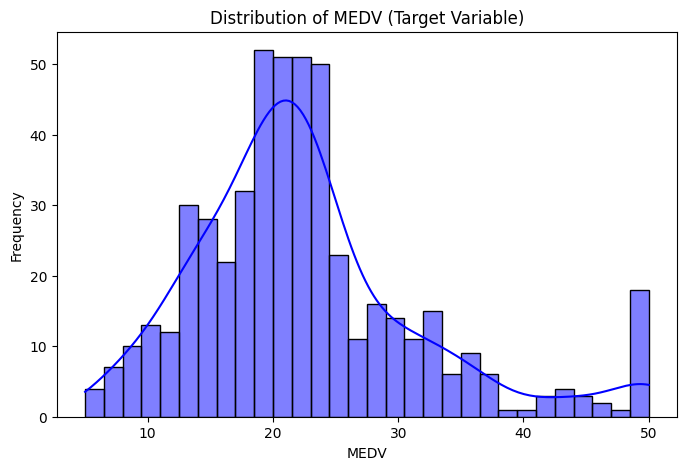

In [42]:
# Distribution of the target variable (MEDV)
plt.figure(figsize=(8, 5))
sns.histplot(df['MEDV'], kde=True, bins=30, color='blue')
plt.title("Distribution of MEDV (Target Variable)")
plt.xlabel("MEDV")
plt.ylabel("Frequency")
plt.show()

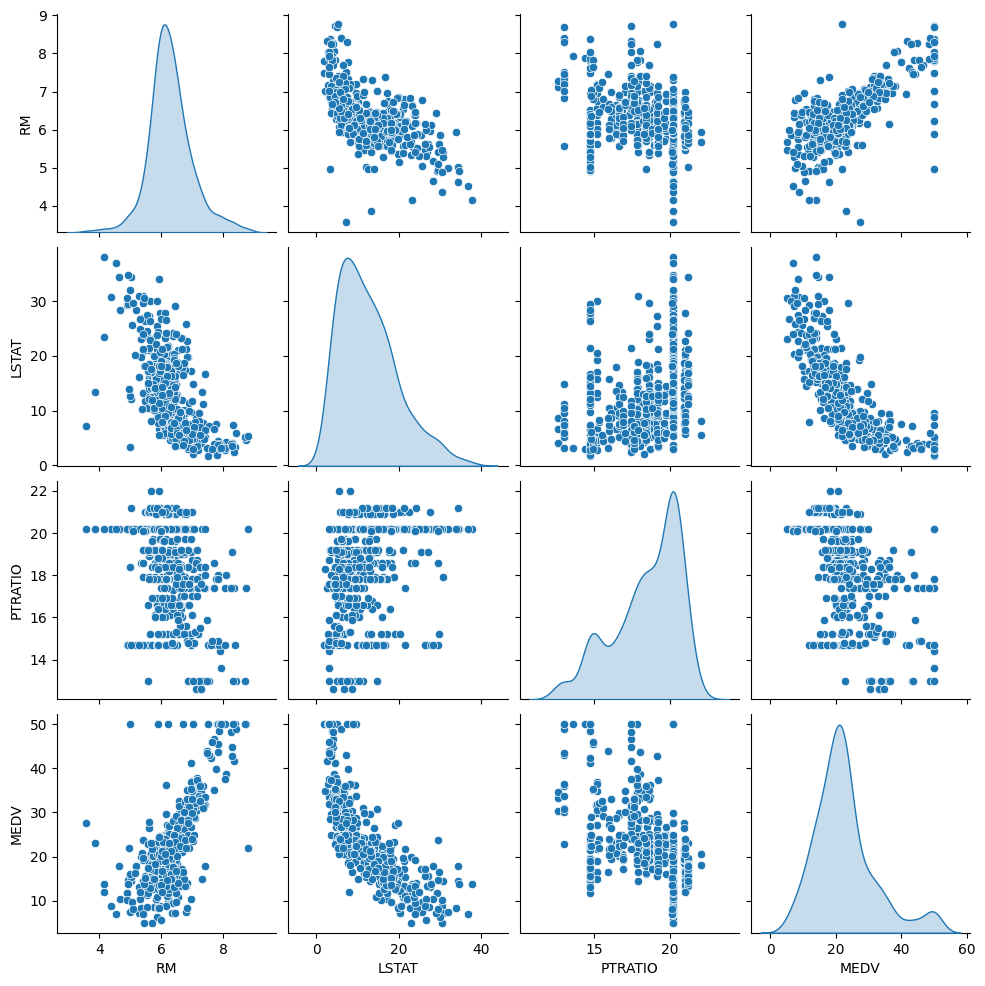

In [43]:
# Visualize relationships between important features and MEDV
selected_features = ['RM', 'LSTAT', 'PTRATIO', 'MEDV']
sns.pairplot(df[selected_features], diag_kind='kde')
plt.show()

**Correlation Analysis**

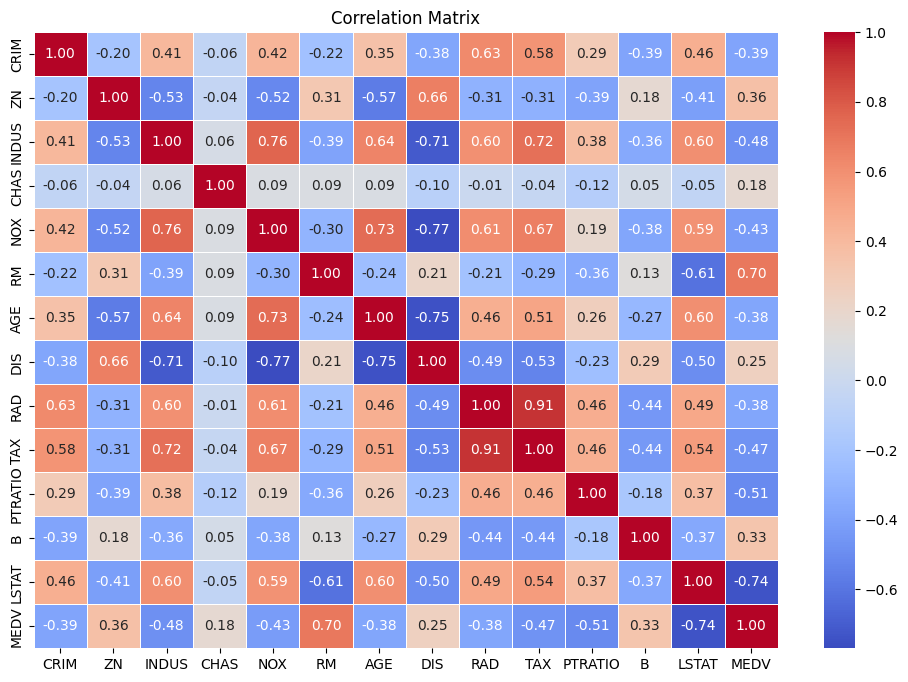

In [44]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [46]:
# Focus on correlations with the target variable (MEDV)
correlation = df.corr()['MEDV'].sort_values(ascending=False)
correlation

,MEDV
MEDV,1.000000
RM,0.695360
ZN,0.360445
B,0.333461
DIS,0.249929
CHAS,0.175260
AGE,-0.376955
RAD,-0.381626
CRIM,-0.388305
NOX,-0.427321


# Data Preprocessing

**Feature Selection**

In [48]:
# Select features based on correlation and domain knowledge
features = ['RM', 'LSTAT', 'PTRATIO']  # Adjust based on your analysis
X = df[features]  # Independent variables
y = df['MEDV']  # Dependent variable (target)

**Splitting Data into Training and Testing Sets**

In [49]:
# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Training Data Shape: (404, 3)
Testing Data Shape: (102, 3)


# Model Selection and Training

**Initialize and Train the Model**

In [52]:
# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Display model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("\nFeature-Coefficient Mapping:")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef}")

Intercept: 14.58809926157104
Coefficients: [ 4.93311836 -0.56712588 -0.86709475]

Feature-Coefficient Mapping:
RM: 4.933118359418637
LSTAT: -0.5671258827383845
PTRATIO: -0.8670947546233044


# Model Evaluation

**Predictions**

In [51]:
# Predict on the test set
y_pred = model.predict(X_test)

**Metrics**

In [53]:
# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Model Performance Metrics:
Mean Squared Error (MSE): 27.11
R-squared (R2): 0.63


**Visualization of Predictions**

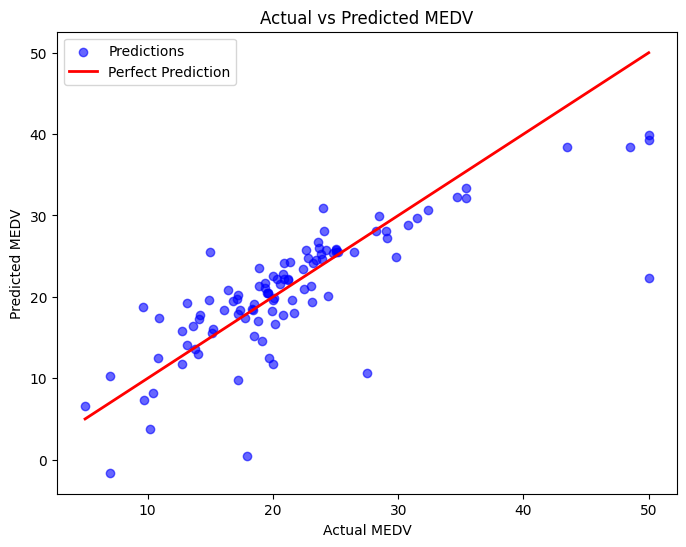

In [54]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Perfect Prediction')
plt.title("Actual vs Predicted MEDV")
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.legend()
plt.show()

# Compare Model Performance

In [55]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

print("Comparison of Models:")
print(f"Linear Regression: MSE={mse:.2f}, R2={r2:.2f}")
print(f"Ridge Regression: MSE={ridge_mse:.2f}, R2={ridge_r2:.2f}")
print(f"Lasso Regression: MSE={lasso_mse:.2f}, R2={lasso_r2:.2f}")

Comparison of Models:
Linear Regression: MSE=27.11, R2=0.63
Ridge Regression: MSE=27.07, R2=0.63
Lasso Regression: MSE=26.79, R2=0.63
